# 02 Linear Q agent

#### üëâ Let's use a linear model to approximat the q-value function.

![linear_model.jpg](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/images/linear_model.jpg?raw=true)

In [4]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment üåé

In [5]:
import gym
env = gym.make('CartPole-v1', render_mode = 'rgb_array')

## Hyperparameters

In [6]:
# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.0005652080372498697,
    'discount_factor': 0.99,
    'batch_size': 64,
    'memory_size': 100000,
    'freq_steps_train': 128,
    'freq_steps_update_target': 100,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 4,
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.0429612235926375,
    'steps_epsilon_decay': 1000
}

SEED = 2636569667

## ‚ö†Ô∏è Fix random seeds

In [7]:
from utils import set_seed
set_seed(env, SEED)

## QAgent

In [8]:
from q_agent import QAgent
agent = QAgent(env, **hparams)

10 parameters


## Train the agent üèãÔ∏è

In [9]:
from loops import train
train(agent, env, n_episodes=2000)

 10%|‚ñà         | 203/2000 [00:10<05:26,  5.51it/s]

Reward mean: 212.01, std: 28.66
Num steps mean: 212.01, std: 28.66


 20%|‚ñà‚ñà        | 402/2000 [00:23<08:33,  3.11it/s]

Reward mean: 275.88, std: 51.30
Num steps mean: 275.88, std: 51.30


 30%|‚ñà‚ñà‚ñà       | 601/2000 [00:44<14:30,  1.61it/s]

Reward mean: 459.71, std: 63.04
Num steps mean: 459.71, std: 63.04


 40%|‚ñà‚ñà‚ñà‚ñà      | 803/2000 [01:02<05:15,  3.80it/s]

Reward mean: 274.88, std: 101.99
Num steps mean: 274.88, std: 101.99


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1002/2000 [01:16<04:29,  3.70it/s]

Reward mean: 255.46, std: 85.75
Num steps mean: 255.46, std: 85.75


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 1201/2000 [01:29<03:35,  3.71it/s]

Reward mean: 228.30, std: 66.40
Num steps mean: 228.30, std: 66.40


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1401/2000 [01:43<03:31,  2.83it/s]

Reward mean: 198.00, std: 46.59
Num steps mean: 198.00, std: 46.59


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1604/2000 [01:54<00:59,  6.60it/s]

Reward mean: 183.52, std: 41.93
Num steps mean: 183.52, std: 41.93


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1804/2000 [02:05<00:31,  6.16it/s]

Reward mean: 170.68, std: 34.61
Num steps mean: 170.68, std: 34.61


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [02:15<00:00, 14.80it/s]

Reward mean: 161.16, std: 37.36
Num steps mean: 161.16, std: 37.36


## Evaluate the agent ‚è±Ô∏è

In [10]:
from loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:16<00:00, 61.18it/s]


In [11]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 165.77, std 36.82


## Let's see how far we got in each attempt

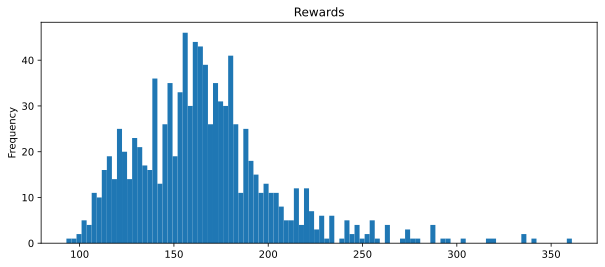

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action üé¨

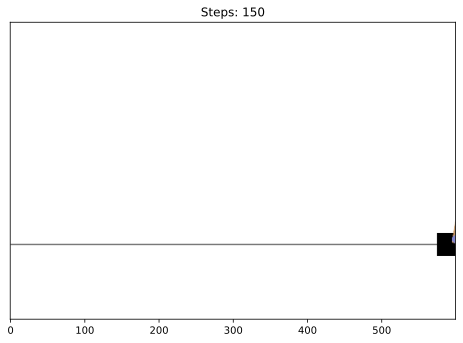

In [15]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

from viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)

In [14]:
eval_rewards, eval_steps = evaluate(
    agent, env,
    n_episodes=10,
    epsilon=0.001
)
eval_rewards

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:00<00:00, 70.02it/s]


[163.0, 149.0, 108.0, 185.0, 173.0, 169.0, 156.0, 171.0, 105.0, 117.0]